In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# patching
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))


from utils.utils import fill_empty_temperatures

In [2]:
path = Path(".").resolve().parent.parent / "data" / "sensors_characteristics"

In [3]:
path

WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics')

In [51]:
for file in path.iterdir():
    if file.name.endswith("_raw.csv"):
        df_raw = pd.read_csv(file)
        df = fill_empty_temperatures(df_raw, "temp", "value")
        df.to_csv(path / f"{file.name.split('_')[0]}.csv", index=False)

In [8]:
df = pd.read_html(data_dir / "sensors_characteristics" / "non-standart.html", encoding='utf-8')[0]

In [14]:
df.rename(columns={0: "Температура", 1: "Cu100", 2: "Cu50", 3: "Cu10", 4: "Ni-Iron 604", 5: "Ni-Iron 507.5", 6: "Ni 120"}, inplace=True)

In [17]:
df = df.iloc[3:]

In [21]:
df["Температура"] = df["Температура"].apply(lambda x: int(x.replace("°С", "")))

C:\Users\fmark\AppData\Local\Temp\ipykernel_4068\3279115245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Температура"] = df["Температура"].apply(lambda x: int(x.replace("°С", "")))


In [22]:
df

,Температура,Cu100,Cu50,Cu10,Ni-Iron 604,Ni-Iron 507.5,Ni 120
3,-200,10.580,5.290,1.058,245.34,NaN,NaN
4,-180,18.840,9.420,1.884,262.53,NaN,NaN
5,-160,27.050,13.525,2.705,283.87,NaN,NaN
6,-150,31.130,15.565,3.113,296.10,NaN,NaN
7,-140,35.190,17.595,3.519,309.36,NaN,NaN
...,...,...,...,...,...,...,...
72,240,183.350,91.675,18.335,NaN,1 249.48,353.14
73,245,185.300,92.650,18.530,NaN,1 268.90,359.79
74,250,187.260,93.630,18.726,NaN,1 288.49,366.53
75,255,189.210,94.605,18.921,NaN,1 308.24,373.37


In [32]:
df_cu_50_raw = pd.DataFrame({"temp": df["Температура"], "value": df["Cu50"]})

In [33]:
df_cu_50_raw["value"] = df_cu_50_raw["value"].apply(float)

In [34]:
df_cu_50 = fill_empty_temperatures(df_cu_50_raw, "temp", "value")

In [35]:
df_cu_50

,temp,value
0,-200,5.29
1,-199,5.50
2,-198,5.70
3,-197,5.91
4,-196,6.12
...,...,...
456,256,94.80
457,257,94.99
458,258,95.19
459,259,95.38


In [36]:
df_cu_50.to_csv(data_dir / "sensors_characteristics" / "Cu 50.csv", index=False)

In [37]:
df_cu_100_raw = pd.DataFrame({"temp": df["Температура"], "value": df["Cu100"]})

In [39]:
df_cu_100_raw["value"] = df_cu_100_raw["value"].apply(float)

In [40]:
df_cu_100 = fill_empty_temperatures(df_cu_100_raw, "temp", "value")

In [41]:
df_cu_100

,temp,value
0,-200,10.58
1,-199,10.99
2,-198,11.41
3,-197,11.82
4,-196,12.23
...,...,...
456,256,189.60
457,257,189.99
458,258,190.38
459,259,190.77


In [42]:
df_cu_100.to_csv(data_dir / "sensors_characteristics" / "Cu 100.csv", index=False)

In [65]:
df = pd.read_csv(path / "100П.csv")

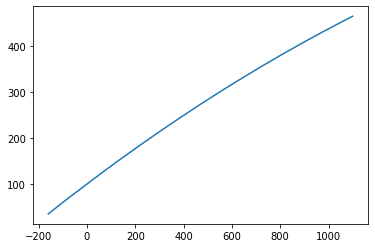

In [67]:
plt.plot(df["temp"].loc[100:], df["value"].loc[100:])

In [56]:
df = pd.read_csv(path / "Cu 50.csv")

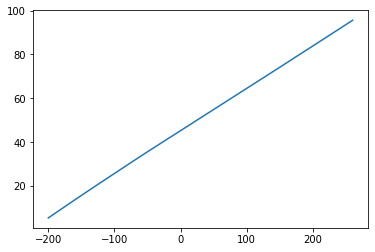

In [57]:
plt.plot(df["temp"], df["value"])

In [63]:
df.loc[0]

temp    -260.0
value      0.4
Name: 0, dtype: float64

In [73]:
def parse_html(df: pd.DataFrame) -> pd.DataFrame:
    df = df[~df.index.isna()]
    df = df[~df.index.str.contains("°С")]
    min_value = int(df.index[0])
    resistances = sorted(list(set([float(x) for x in df.values.flatten() if not np.isnan(float(x))])))
    temperatures = [i + min_value for i in range(len(resistances))]
    return pd.DataFrame({"temp": temperatures, "value": resistances})

In [74]:
for resistor in ["100М", "Cu 100", "Pt 100"]:
    file = path.parent / "raw" / f"{resistor}.html"
    df = pd.read_html(file, encoding="utf-8", index_col=0)[0]
    df = parse_html(df)
    df.to_csv(path / f"{resistor}.csv", index=False)

In [84]:
# Cu 50
r0 = 50
A = 0.00426
temperatures = [t for t in range(-50, 201)]
resistances = [round(r0 * (1 + A*t), 2) for t in temperatures]
df = pd.DataFrame({"temp": temperatures, "value": resistances})

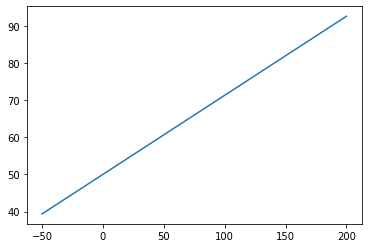

In [85]:
plt.plot(df["temp"], df["value"])

In [86]:
df.to_csv(path / "Cu 50.csv", index=False)

In [89]:
# Pt50
r0 = 50
A = 3.9083e-3
B = -5.775e-7
C = -4.183e-12
temperatures = [i for i in range(-200, 751)]
resistances = map(lambda x: round(x, 2), [r0 * (1 + A*t + B*t**2 + C*(t-100) * t**3) if t <= 0 else r0*(1 + A*t + B*t**2) for t in temperatures])
df = pd.DataFrame({"temp": temperatures, "value": resistances})

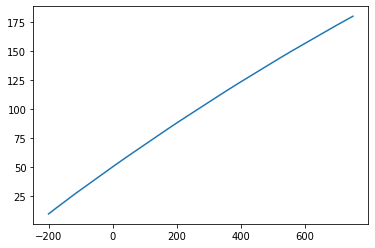

In [93]:
plt.plot(df["temp"], df["value"])

In [95]:
df.to_csv(path / "Pt 50.csv", index=False)